<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wordcloud

Wordcloud é também um tipo de visualização de dados muito poderosa, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

Uma dificuldade que temos é excluir palavras como artigos e pronomes da nossa análise. Uma vez que eles aparecem com frequência, podem tirar o protagonismo de palavras que de fato deveriam aparecer maiores.

Para conseguir desenhar uma wordcloud em Python, temos que instalar a biblioteca `wordcloud` na máquina. Vamos fazer isso e usar o *dataset* completo do Airbnb para algumas cidades.

In [2]:
#Instalando a biblioteca para WorldCloud
!pip install wordcloud -q

In [3]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

##Londres

Para gerar a worldcloud iremos utilizar as informações dos anúncios do AirBnB que podem ser consultadas no site:

bases AirBnB : [link](http://insideairbnb.com/get-the-data.html)

procure pelo arquivo que contenha a descrição: `Detailed Listings data for...` para a cidade que estiver buscando.

In [11]:
data_london = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-05-10/data/listings.csv.gz'

df = pd.read_csv(data_london)
df.head() #vamos ver as primeiras linhas

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20200510041510,2020-05-13,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,80%,88%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",LB of Islington,Islington,...,$15.00,1,29,1,1,29,29,1.0,29.0,13 months ago,t,26,56,86,361,2020-05-13,21,6,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,f,3,1,2,0,0.18
1,15400,https://www.airbnb.com/rooms/15400,20200510041510,2020-05-13,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,100%,86%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Chelsea,Kensington and Chelsea,...,$0.00,10,50,10,10,50,50,10.0,50.0,4 months ago,t,0,2,2,256,2020-05-13,89,4,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,t,t,1,1,0,0,0.70
2,17402,https://www.airbnb.com/rooms/17402,20200510041510,2020-05-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in th

Para fazer nossa wordcloud, eu irei eliminar as linhas contendo valores ausente, uma vez que dessa vez não faremos análise dos valores, mas apenas precisamso das descrições.

In [5]:
# ver a quantidade de valores ausentes
print("Valores ausentes para summary: ", df.summary.isnull().sum())

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']

Valores ausentes para summary:  4887


Basicamente, eu apenas eliminei os valores nulos da coluna summary e atribui a Series a outra variável. Para criar a wordcloud, vou concatenar todas as strings, como se fosse uma linha única.

In [6]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 27807274


Agora sim, vamos para a biblioteca wordcloud. A primeira etapa consiste em criar uma lista de stopword, que basicamente são palavras que devem ser removidas da wordcloud, como "a", "não", "mas", "and", "I", "not", etc.

Na sequência, segue o comando para gerar a nuvem, seguindo as orientações da documentação oficial do pacote.

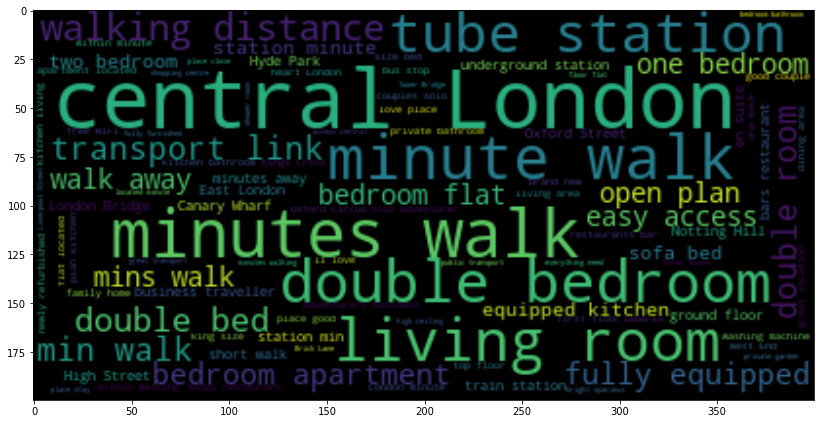

In [8]:
# lista de stopword
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Para português seria necessário acrescentar algumas palavras na lista de stopword, para tanto utilize o comando: 
### lista de stopword
stopwords = set(STOPWORDS)

stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

##Cingapura

In [25]:
data_singapure = 'http://data.insideairbnb.com/singapore/sg/singapore/2020-05-27/data/listings.csv.gz'

df2 = pd.read_csv(data_singapure)


Eliminando as informações ausentes

In [26]:
# ver a quantidade de valores ausentes
print("Valores ausentes para summary: ", df2.summary.isnull().sum())

# eliminar as colunas com valores ausentes
summary2 = df2.dropna(subset=['summary'], axis=0)['summary']

Valores ausentes para summary:  317


Novamente iremos concatenar as descrições em uma única string.

In [27]:
# concatenar as palavras
all_summary2 = " ".join(s for s in summary2)

print("Quantidade de Palavras: {}".format(len(all_summary2)))

Quantidade de Palavras: 2323066


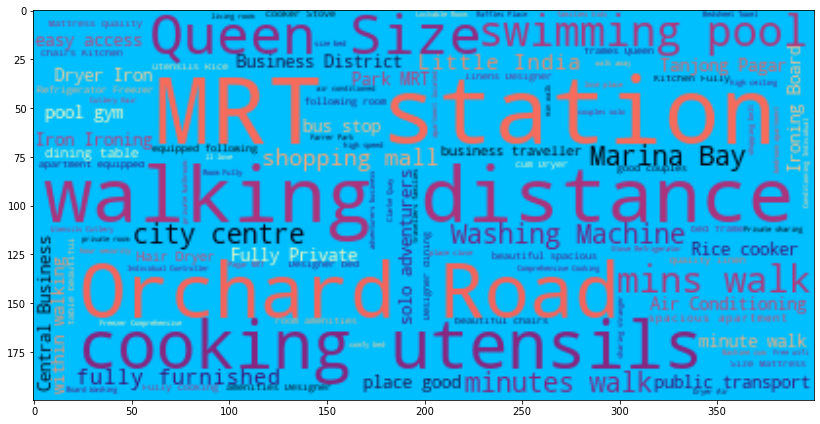

In [35]:
# lista de stopword
stopwords2 = set(STOPWORDS)

# gerar uma wordcloud
wordcloud2 = WordCloud(stopwords=stopwords2, colormap="magma",
                      background_color="deepskyblue").generate(all_summary2)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud2, interpolation='bilinear')

plt.tight_layout()

## plotar sobre uma máscara

Apenas essa nuvem já seria suficiente para uma análise. No entanto, se você quiser gerar um efeito visual a mais, saiba que é possível usar imagens como máscaras nas wordclouds.

O wordcloud analisa as intensidades dos pixels e considera o que está em preto como área para desenhar as palavras. Vou importar a figura acima, e vamos ver o resultado na prática!

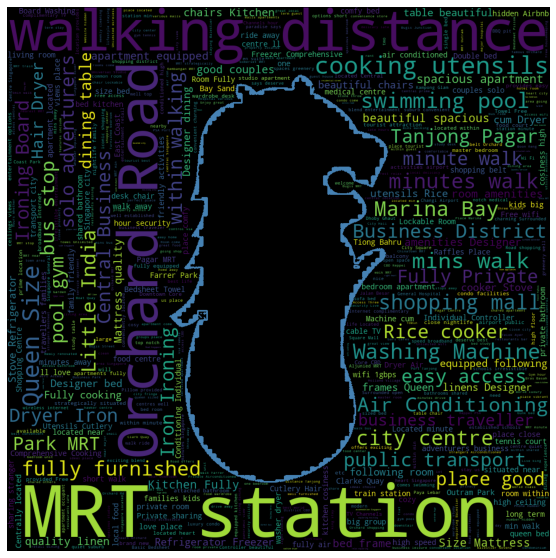

In [53]:
# bibliotecas necessárias
import numpy as np
from PIL import Image

# endereço LOCAL da SUA imagem
sing_image = np.array(Image.open("/content/merlion-singapore.jpg"))
   
# gerar uma wordcloud
wordcloud3 = WordCloud(stopwords=stopwords2,
                      background_color="black",
                      width=1000, height=1000, max_words=500,
                      mask=sing_image, max_font_size=200,
                      min_font_size=.5, contour_width=3, contour_color='steelblue').generate(all_summary2)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud3, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud3);
#wordcloud.to_file("airbnb_summary_wordcloud.png")

E se fizermos também para o primeiro exemplo, da cidade de Londres?

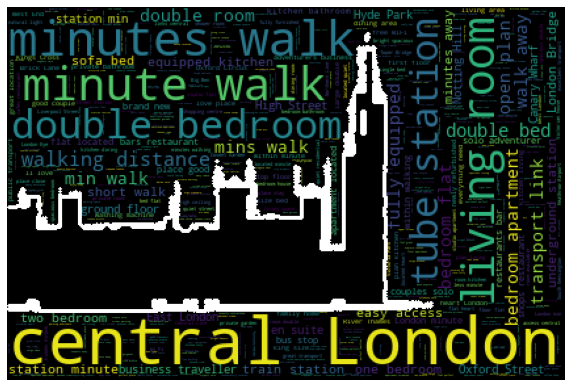

In [58]:
# endereço LOCAL da SUA imagem
london_image = np.array(Image.open("/content/london-bw.jpg"))
   
# gerar uma wordcloud
wordcloud4 = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=500,
                      mask=london_image, max_font_size=50,
                      min_font_size=.5,contour_width=2, contour_color='white' ).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud4, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud4);
#wordcloud.to_file("airbnb_summary_wordcloud.png")